In [19]:
import pandas as pd

# 데이터 예시
data = {
    'CustomerID': [1, 2, 3, 4, 5],
    'Age': [25, 30, None, 35, 28],
    'Gender': ['Male', 'Female', 'Female', 'Male', None],
    'Satisfaction': [5, 4, 3, None, 2],
    'PurchaseAmount': [100, 200, None, 150, 0]
}
df = pd.DataFrame(data)

In [20]:
df

,CustomerID,Age,Gender,Satisfaction,PurchaseAmount
0,1,25.0,Male,5.0,100.0
1,2,30.0,Female,4.0,200.0
2,3,NaN,Female,3.0,NaN
3,4,35.0,Male,NaN,150.0
4,5,28.0,None,2.0,0.0


In [21]:
# 결측치 처리
df['Age'].fillna(df['Age'].mean(), inplace=True)    # inplace : 원본에다 바로 처리
df['PurchaseAmount'].fillna(0, inplace=True)

# print(df)
# 데이터 요약
print(df.describe())

       CustomerID        Age  Satisfaction  PurchaseAmount
count    5.000000   5.000000      4.000000        5.000000
mean     3.000000  29.500000      3.500000       90.000000
std      1.581139   3.640055      1.290994       89.442719
min      1.000000  25.000000      2.000000        0.000000
25%      2.000000  28.000000      2.750000        0.000000
50%      3.000000  29.500000      3.500000      100.000000
75%      4.000000  30.000000      4.250000      150.000000
max      5.000000  35.000000      5.000000      200.000000


C:\Users\User\AppData\Local\Temp\ipykernel_10360\3366658329.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)    # inplace : 원본에다 바로 처리
C:\Users\User\AppData\Local\Temp\ipykernel_10360\3366658329.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beh

In [22]:
# Gender는 숫자로 변환 (Label Encoding)
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# 특성과 타겟 분리
X = df[['Age', 'Gender', 'PurchaseAmount']] # 입력 데이터 - feature
y = df['Satisfaction'] # 출력 데이터 - 결과 - target

print(X)
print(y)


    Age  Gender  PurchaseAmount
0  25.0     0.0           100.0
1  30.0     1.0           200.0
2  29.5     1.0             0.0
3  35.0     0.0           150.0
4  28.0     NaN             0.0
0    5.0
1    4.0
2    3.0
3    NaN
4    2.0
Name: Satisfaction, dtype: float64


In [23]:
from sklearn.model_selection import train_test_split

In [24]:
# 튜플 데이터 형식이라 순서 맞춰야 함
x_train, x_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    random_state=42
)

In [26]:
print(x_train)
print(y_train)
print(x_test)
print(y_test)

    Age  Gender  PurchaseAmount
4  28.0     NaN             0.0
2  29.5     1.0             0.0
0  25.0     0.0           100.0
3  35.0     0.0           150.0
4    2.0
2    3.0
0    5.0
3    NaN
Name: Satisfaction, dtype: float64
    Age  Gender  PurchaseAmount
1  30.0     1.0           200.0
1    4.0
Name: Satisfaction, dtype: float64


In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [28]:
# 1. 데이터 준비
X = np.array([1,2,3,4,5]).reshape(-1, 1)    # 학습데이터 : 공부 시간 (2D로 변환)
y = np.array([50,55,65,70,75])              # 라벨 : 결과 - 시험점수

In [ ]:
# 2. 모델 학습 : 모델 객체 생성 -> 학습
model = LinearRegression()  # 선형회귀 모델 생성
# 훈련
model.fit(X, y)

# 파라미터 디폴트로 들어가 있음

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [31]:
# 3. 학습 결과 지표 : 기울기, 절편
m = model.coef_[0]      # 기울기
b = model.intercept_    #  절편
print('학습된 기울기 : ', m)
print('학습된 절편 : ', b)

학습된 기울기 :  6.500000000000001
학습된 절편 :  43.5


In [34]:
# 4. 학습된 모델로 (기울기와 절편을 이용하여) 값 예측 : predict
y_pred = model.predict(X)
# 원래 데이터 : 시간당 성적 -> [50,55,65,70,75]
print(y_pred)

[50.  56.5 63.  69.5 76. ]


In [ ]:
# 5. 성능 평가
mse = mean_squared_error(y, y_pred)     # 성능 평가 할 수 있는 함수
rmse = np.sqrt(mse)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)
print('mse : ', mse)
print('rmse : ', rmse)
print('mae : ', mae)
print('r2 : ', r2)

# 오차가 좀 있어요 -> 성능이 그렇게 좋진 않네요

mse :  1.5
rmse :  1.224744871391589
mae :  1.0
r2 :  0.9825581395348837


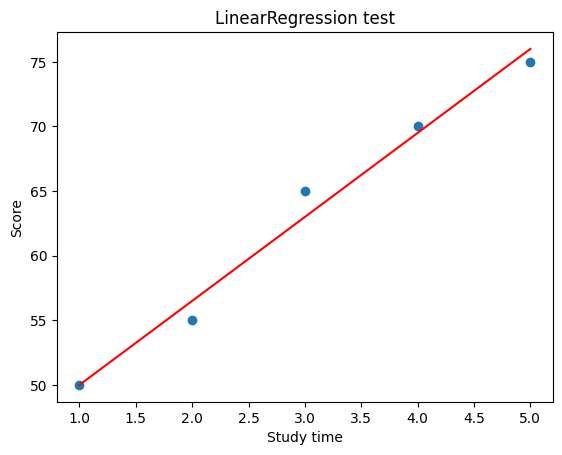

In [39]:
# 시각화
plt.scatter(X, y, colorizer='blue', label='Original Data')
plt.plot(X, y_pred, color='red', label='Predicted data') # 예측한 값과 선을 이어줌
plt.xlabel('Study time')
plt.ylabel('Score')
plt.title('LinearRegression test')
plt.show()

In [ ]:
# 6시간 => 예측해 보고 싶다!
# new_hour = np.array([6])
new_hour = np.array([3, 6]).reshape(-1, 1)
predict_score = model.predict(new_hour)
print(predict_score)

[63.  82.5]


In [ ]:
# AI Hub, Kaggle에서 데이터 받을 수 있음